In [1]:
import os
directory = r'C:\Users\Kacper\Desktop\RO\lab03'
os.chdir(directory)

<ipython-input-9-a820e765c93f>:52: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


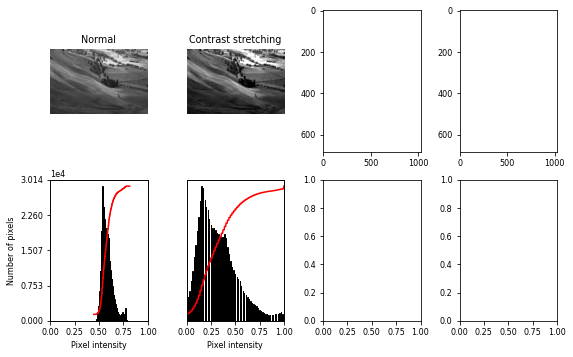

In [9]:
from skimage.filters import threshold_minimum
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

img = cv2.imread('wiki.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Normal')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

<ipython-input-51-c0b5ccb61366>:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((1, 2), dtype=np.object)
<ipython-input-51-c0b5ccb61366>:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


(<AxesSubplot:>,
 <AxesSubplot:xlabel='Pixel intensity'>,
 <AxesSubplot:label='f35a453b-164e-4c50-954c-0887fe4f2230'>)

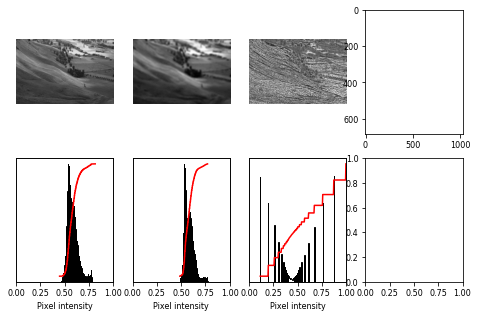

In [51]:
img = cv2.imread('wiki.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.blur(img, (20,20))


img_res = img - img_blur
img_res = 255 - img_res

axes = np.zeros((1, 2), dtype=np.object)

fig = plt.figure(figsize=(8, 5))


axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

img_eq = exposure.equalize_hist(img_res)

plot_img_and_hist(img, axes[:, 0])
plot_img_and_hist(img_blur, axes[:, 1])
plot_img_and_hist(img_eq, axes[:, 2])

Text(0.5, 1.0, 'szukanie krawedzi')

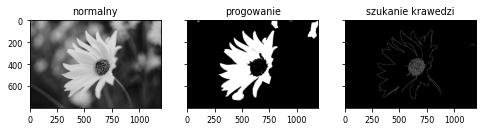

In [49]:
from skimage.feature import canny
images = cv2.imread('ex4.jpg')
images = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

axes[0].imshow(images, cmap=plt.cm.gray)
axes[0].set_title('normalny')

axes[1].imshow(images > 160, cmap=plt.cm.gray)
axes[1].set_title('progowanie')
axes[1].contour(images, [0.5], linewidths=1.2, colors='y')

axes[2].imshow(canny(images), cmap=plt.cm.gray)
axes[2].set_title('szukanie krawedzi')